### Importing library

In [1]:
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Loading the dataset

In [2]:
df = pd.read_excel("new_dataset.xlsx")
df.head()

,x,y,x_m,y_m,deviation
0,511.3638,-19.0811,511.3442,´-19.0409,0.0447
1,512.3229,-19.0894,512.3169,-19.0784,0.0125
2,513.2820,-19.0977,513.2945,-19.1184,0.0242
3,514.2654,-19.1060,514.3004,-19.1570,0.0618
4,515.3302,-19.1225,515.3616,-19.1619,0.0504


### Checking each column information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          50 non-null     float64
 1   y          50 non-null     float64
 2   x_m        50 non-null     float64
 3   y_m        50 non-null     object 
 4   deviation  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Data Preprocessing 

In [4]:
# we converted the y_m column string type value into numeric type value
df['y_m'][0] = -19.0409
df['y_m'] = df['y_m'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_880\217937347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_m'][0] = -19.0409


### Seperating the train and test data

In [5]:
input_data = torch.Tensor(df.iloc[:,:-1].values)
target_data = torch.Tensor(df.iloc[:, -1].values)
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.33, random_state=42)

### Making the Pytorch model

In [6]:

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(4, 8)
        self.layer2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x

### Compiling the model

In [7]:
model = MyModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

### Training the Model over 500 epochs

In [8]:
losses = []

for epoch in range(500):
    
    # Forward pass
    output = model(X_train)
    
    # Compute loss
    loss = criterion(output, y_train)
    
    # Backward pass and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss
    if epoch % 10 == 0:
        losses.append(int(loss.item()))
        print(f'Epoch {epoch}, Loss: {loss.item()}')

C:\Users\User\anaconda3\envs\TattoExtractor\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([33])) that is different to the input size (torch.Size([33, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 205.1259307861328
Epoch 10, Loss: 6.547366142272949
Epoch 20, Loss: 11.949485778808594
Epoch 30, Loss: 2.8631017208099365
Epoch 40, Loss: 1.555451512336731
Epoch 50, Loss: 0.8450368642807007
Epoch 60, Loss: 0.6465712785720825
Epoch 70, Loss: 0.4983384907245636
Epoch 80, Loss: 0.5073537230491638
Epoch 90, Loss: 0.4725472927093506
Epoch 100, Loss: 0.47547411918640137
Epoch 110, Loss: 0.47111013531684875
Epoch 120, Loss: 0.46913328766822815
Epoch 130, Loss: 0.46802157163619995
Epoch 140, Loss: 0.46654894948005676
Epoch 150, Loss: 0.465172678232193
Epoch 160, Loss: 0.463793009519577
Epoch 170, Loss: 0.4623591899871826
Epoch 180, Loss: 0.46089115738868713
Epoch 190, Loss: 0.4593881666660309
Epoch 200, Loss: 0.4578506350517273
Epoch 210, Loss: 0.4562770426273346
Epoch 220, Loss: 0.4546721577644348
Epoch 230, Loss: 0.45303457975387573
Epoch 240, Loss: 0.4513678550720215
Epoch 250, Loss: 0.44967278838157654
Epoch 260, Loss: 0.44794905185699463
Epoch 270, Loss: 0.446198970079422


### Model training Loss rate at each iteration

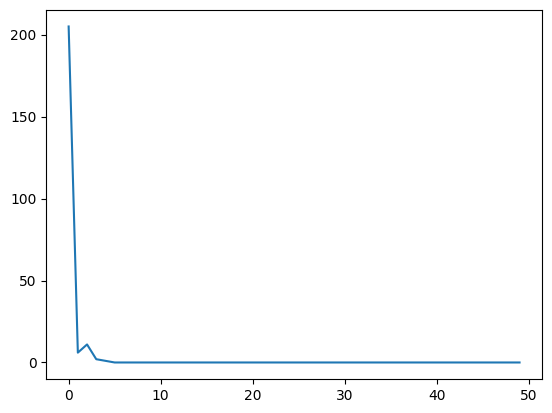

In [9]:
plt.plot(losses)
# losses

### Evaluating the model over the test data

In [10]:
y_pred = model(X_test)
print(f"MSE over the model prediction: {mean_absolute_error(y_test.tolist(), y_pred.tolist())}")

MSE over the model prediction: 0.5074741436606821


### Testing over the test data

In [26]:
test = pd.read_excel("test.xlsx")
test.head()

,x,y,x_m,y_m
0,296.9877,-12.4357,296.9878,-12.4534
1,292.9826,-12.4413,292.9826,-12.4551
2,288.9774,-12.4470,288.9775,-12.4650
3,284.9723,-12.4526,284.9722,-12.3927
4,280.9671,-12.4583,280.9670,-12.3927


In [27]:
prediction = model(torch.Tensor(test.values))
test["prediction"] = prediction.detach().numpy().flatten()
test

,x,y,x_m,y_m,prediction
0,296.9877,-12.4357,296.9878,-12.4534,0.950160
1,292.9826,-12.4413,292.9826,-12.4551,0.977280
2,288.9774,-12.4470,288.9775,-12.4650,1.005373
3,284.9723,-12.4526,284.9722,-12.3927,1.023964
4,280.9671,-12.4583,280.9670,-12.3927,1.050907
5,276.9620,-12.4640,276.9617,-12.2433,1.060636
6,272.9568,-12.4696,272.9568,-12.4186,1.107771
7,268.9517,-12.4753,268.9516,-12.4060,1.133257
8,264.9466,-12.4809,264.9465,-12.4689,1.167424
9,260.9423,-12.4861,260.9424,-12.5937,1.208686


In [24]:
test.to_csv("test_results.csv", index=False)